In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Generate synthetic data for assets process
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Asset_Utilization': np.random.uniform(60, 90, n),     # Utilization rate in %
    'Downtime_Rate': np.random.uniform(1, 5, n),           # Downtime rate in %
    'Maintenance_Cost': np.random.normal(12000, 2500, n),  # Maintenance cost in $
    'Storage_Cost': np.random.normal(50000, 10000, n),     # Storage cost in $
    'Operational_Cost': np.random.normal(20000, 5000, n),  # Operational cost in $
    'Energy_Consumption': np.random.uniform(200, 500, n),  # Energy usage in kWh
    'Idle_Time': np.random.uniform(5, 15, n),              # Idle time in hours
    'Repair_Cost': np.random.normal(8000, 2000, n),        # Repair cost in $
    'Cloud_Cost': np.random.normal(60000, 12000, n),       # Cloud storage cost in $
    'InHouse_Cost': np.random.normal(45000, 10000, n),     # In-house storage cost in $
    'Server_Utilization': np.random.uniform(50, 95, n),    # Utilization in %
    'Downtime_Hours': np.random.uniform(1, 20, n)          # Downtime in hours
})

# Add calculated fields
data['Total_Cost'] = data['Maintenance_Cost'] + data['Storage_Cost'] + data['Operational_Cost']
data['Cost_Per_Utilization'] = data['Total_Cost'] / data['Asset_Utilization']

In [49]:
data.head(5)

,Asset_Utilization,Downtime_Rate,Maintenance_Cost,Storage_Cost,Operational_Cost,Energy_Consumption,Idle_Time,Repair_Cost,Cloud_Cost,InHouse_Cost,Server_Utilization,Downtime_Hours,Total_Cost,Cost_Per_Utilization
0,71.236204,1.125717,10299.938196,71221.561970,24288.298116,400.267322,7.886306,8218.789589,61370.731784,47670.502659,78.467985,11.633325,105809.798282,1485.337413
1,88.521429,3.545642,12580.634243,60324.652606,19200.307350,251.695961,10.812382,9451.533248,61803.621138,53896.307956,91.941265,1.185646,92105.594199,1040.489236
2,81.959818,2.257424,12732.681183,34806.300340,19904.918960,257.686706,6.543627,8962.018463,55636.653453,45822.839893,54.612938,7.202765,67443.900484,822.889825
3,77.959755,3.034283,10214.121455,45157.659271,14987.353177,212.260585,9.811401,8447.768049,59316.652515,55654.803751,92.175282,10.836521,70359.133903,902.505842
4,64.680559,4.630266,16664.436278,62669.111492,19907.434320,250.680519,10.325894,6419.051089,63693.621227,39827.115499,80.954858,2.669463,99240.982090,1534.324738


## 1. Boxplot for Cost Distribution Across Categories

Illustrates the distribution of costs across different categories, such as Maintenance Cost, Storage Cost, Operational Cost, and Repair Cost. This chart highlights the median values, interquartile ranges, and any outliers. It helps in identifying categories with significant cost variability or unusually high expenses, which can inform budgeting priorities and highlight areas for optimization.

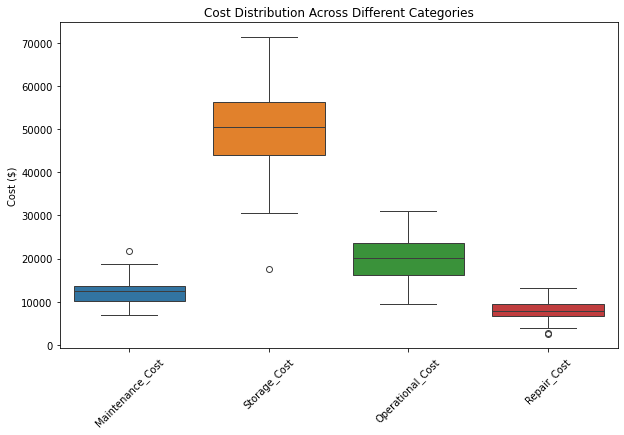

In [50]:
# 1. Boxplot for cost distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Maintenance_Cost', 'Storage_Cost', 'Operational_Cost', 'Repair_Cost']])
plt.title('Cost Distribution Across Different Categories')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.show()

## 2. Scatter Plot: Asset Utilization vs Total Cost

Explores the relationship between Asset Utilization (X-axis) and Total Cost (Y-axis). Each data point is color-coded by Downtime Rate (%) and sized according to Energy Consumption (kWh). This visualization provides insights into whether higher asset utilization is associated with increased costs and highlights assets with high downtime or excessive energy usage that may require attention.

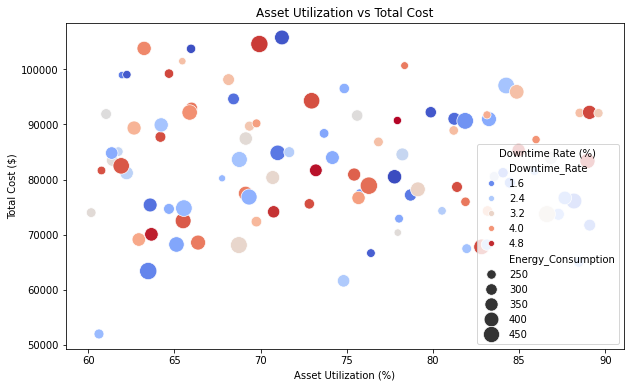

In [51]:
# 2. Scatter plot for Asset Utilization vs Total Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Asset_Utilization'], y=data['Total_Cost'], hue=data['Downtime_Rate'], size=data['Energy_Consumption'], sizes=(50, 300), palette="coolwarm")
plt.title('Asset Utilization vs Total Cost')
plt.xlabel('Asset Utilization (%)')
plt.ylabel('Total Cost ($)')
plt.legend(title='Downtime Rate (%)')
plt.show()

## 3. Line Plot: Downtime Rate and Idle Time Trends

The trends of Downtime Rate and Idle Time over time. The red line represents Downtime Rate (%), while the blue dashed line indicates Idle Time (hours). This comparison helps track how these two metrics change together, enabling a better understanding of operational inefficiencies and the impact of maintenance schedules or policy changes.

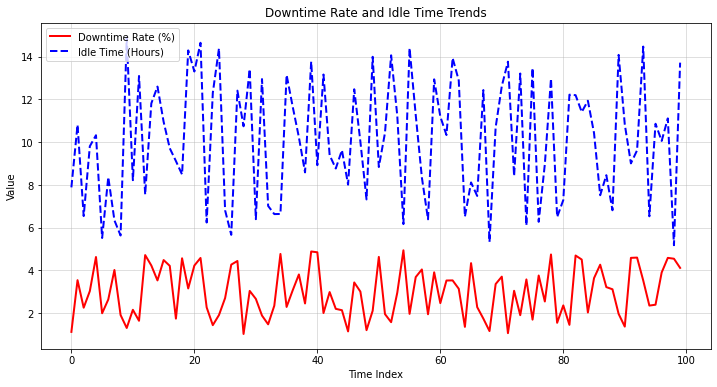

In [52]:
# 3. Line plot for Downtime Rate and Idle Time trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Downtime_Rate'], label='Downtime Rate (%)', color='red', linewidth=2)
plt.plot(data.index, data['Idle_Time'], label='Idle Time (Hours)', color='blue', linestyle='--', linewidth=2)
plt.title('Downtime Rate and Idle Time Trends')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

## 4. Heatmap for correlation between metrics


The correlation matrix for key asset metrics. It shows relationships between variables such as Asset Utilization, Maintenance Cost, Downtime Rate, and Idle Time. Strong positive or negative correlations are easily identifiable through color intensity, providing actionable insights for optimizing asset performance. For example, a strong correlation between Maintenance Cost and Downtime Rate may indicate a need to improve maintenance strategies.

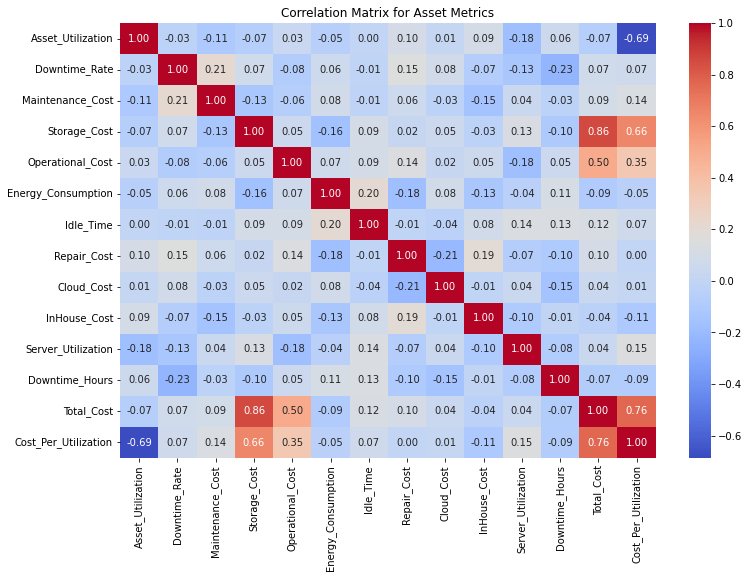

In [53]:
# 4. Heatmap for correlation between metrics
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Asset Metrics')
plt.show()

## 5. Line Plot: Total Cost Per Utilization Over Time



The trend of Total Cost Per Utilization over time, calculated as Total Cost divided by Asset Utilization. This plot reveals how efficiently costs are managed relative to asset utilization. A downward trend would suggest improving cost efficiency, while an upward trend may highlight areas needing further investigation.

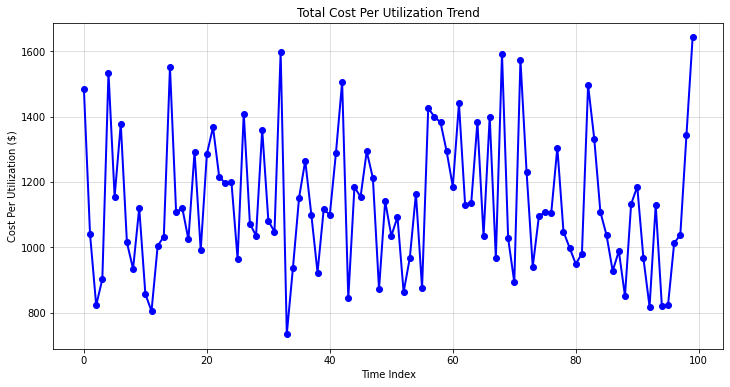

In [54]:
# 5. Line plot for Total Cost per Utilization over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cost_Per_Utilization'], color='blue', linewidth=2, marker='o')
plt.title('Total Cost Per Utilization Trend')
plt.xlabel('Time Index')
plt.ylabel('Cost Per Utilization ($)')
plt.grid(alpha=0.5)
plt.show()

## 6. KDE Plot: Downtime Hours vs Server Utilization

This plot uses a Kernel Density Estimation (KDE) to visualize the distribution of downtime hours and their relationship with server utilization. By showing the density of occurrences for specific ranges of downtime and utilization rates, this plot highlights patterns such as whether higher downtime correlates with lower utilization. Peaks in the KDE curve indicate the most common values, while broader distributions reveal variability in the data. This visualization helps identify operational inefficiencies or utilization imbalances.

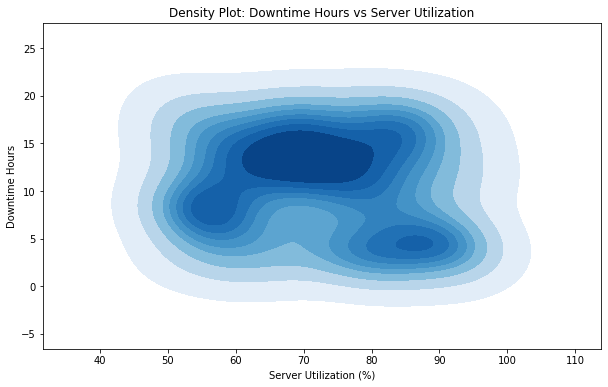

In [55]:
# 6. KDE Plot: Downtime Hours vs Server Utilization
plt.figure(figsize=(10, 6))
sns.kdeplot(x=data['Server_Utilization'], y=data['Downtime_Hours'], cmap='Blues', fill=True)
plt.title('Density Plot: Downtime Hours vs Server Utilization')
plt.xlabel('Server Utilization (%)')
plt.ylabel('Downtime Hours')
plt.show()